In [1]:
# Common imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
import warnings

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

In [3]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [4]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
118/363 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 2.4771

c:\Users\omarc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 1.4629 - val_loss: 3.8663
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 0.5197 - val_loss: 0.3941
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 0.4174 - val_loss: 0.3877
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 0.4203 - val_loss: 0.3740
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.3841 - val_loss: 0.3688
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.4070 - val_loss: 0.3709
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 0.3961 - val_loss: 0.3628
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 0.3871 - val_loss: 0.3598
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.3871 - val_loss: 0.3730
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.3745 - val_loss: 0.3735
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 0.3702 - val_loss: 0.3747
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 

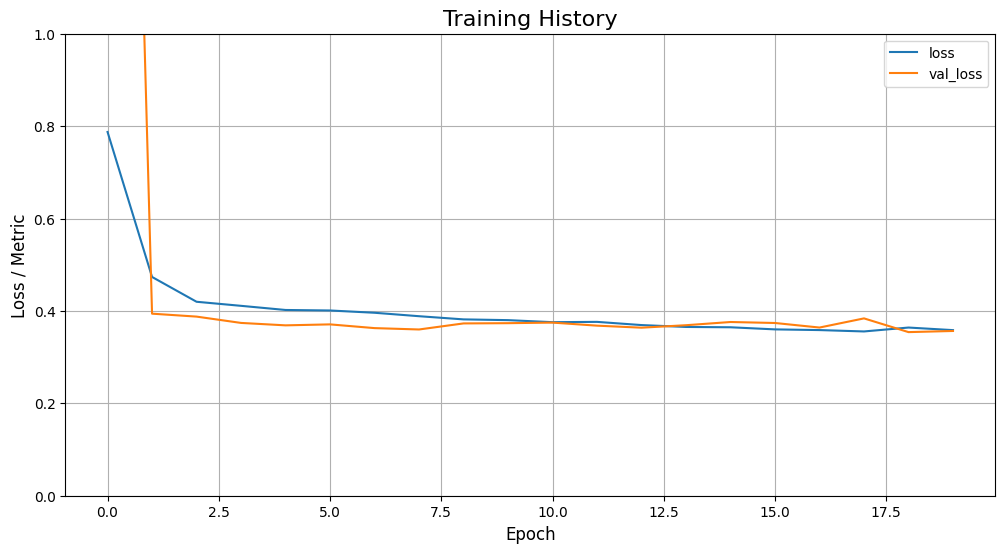

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))  # 👈 Increase the figure size
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # Keep Y-axis limits if needed
plt.title("Training History", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss / Metric", fontsize=12)
plt.legend(pd.DataFrame(history.history).columns, fontsize=10)
plt.show()


In [7]:
y_pred = model.predict(X_valid)
print("Sample prediction:", y_pred[:5].flatten())
print("Actual values:", y_valid[:5])


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
Sample prediction: [1.5146707 1.5675471 2.0489306 2.14755   2.7827754]
Actual values: [1.625 2.25  1.568 2.124 2.573]


In [19]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mae"])

In [12]:
def print_data_split_proportions(X_train, X_valid, X_test):
    total = len(X_train) + len(X_valid) + len(X_test)
    
    print("📊 Data Split Proportions (based on number of samples):")
    print(f"  - Training    : {len(X_train):5d} samples ({len(X_train)/total:.2%})")
    print(f"  - Validation  : {len(X_valid):5d} samples ({len(X_valid)/total:.2%})")
    print(f"  - Test        : {len(X_test):5d} samples ({len(X_test)/total:.2%})")

print_data_split_proportions(X_train, X_valid, X_test)

📊 Data Split Proportions (based on number of samples):
  - Training    : 11610 samples (56.25%)
  - Validation  :  3870 samples (18.75%)
  - Test        :  5160 samples (25.00%)


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_metrics(model, X, y, dataset_name="Test"):
    y_pred = model.predict(X).flatten()
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"📊 {dataset_name} Set Evaluation")
    print(f"  - MSE : {mse:.4f}")
    print(f"  - MAE : {mae:.4f}")
    print(f"  - R²  : {r2:.4f}")
    
    return mse, mae, r2


In [ ]:
evaluate_metrics(model, X_valid, y_valid, dataset_name="Validation")
evaluate_metrics(model, X_test, y_test, dataset_name="Test")

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
📊 Validation Set Evaluation
  - MSE : 0.3566
  - MAE : 0.4122
  - R²  : 0.7288
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
📊 Test Set Evaluation
  - MSE : 0.3481
  - MAE : 0.4171
  - R²  : 0.7370


(0.34806633904143885, 0.41707478118564545, 0.7369546730436454)

In [ ]:
# pip install keras-tuner

  Using cached keras_tuner-1.4.7-py3-none-any.whl.metadata (5.4 kB)
  Using cached kt_legacy-1.0.5-py3-none-any.whl.metadata (221 bytes)
Using cached keras_tuner-1.4.7-py3-none-any.whl (129 kB)
Using cached kt_legacy-1.0.5-py3-none-any.whl (9.6 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import keras_tuner as kt
from tensorflow import keras

### Defining a HyperModel

def build_tuned_model(hp):
    input = keras.layers.Input(shape=(8,))
    
    # Tune number of hidden layers (1 to 3)
    x = input
    for i in range(hp.Int("num_layers", 1, 3)):
        units = hp.Int(f"units_{i}", min_value=16, max_value=128, step=16)
        x = keras.layers.Dense(units, activation="relu")(x)
        
        # Optional: Tune dropout
        if hp.Boolean("use_dropout"):
            x = keras.layers.Dropout(rate=hp.Float("dropout_rate", 0.1, 0.5, step=0.1))(x)
    
    # Concatenate with original input (like the original model)
    concat = keras.layers.Concatenate()([input, x])
    output = keras.layers.Dense(1)(concat)

    model = keras.Model(inputs=input, outputs=output)
    
    # Tune learning rate
    lr = hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                  loss="mse", metrics=["mae"])
    return model


In [17]:
### Initializing and running the tuner
tuner = kt.RandomSearch(
    build_tuned_model,
    objective="val_mae",  # Minimize validation MAE
    max_trials=10,        # Number of different models to try
    executions_per_trial=1,
    directory="kt_dir",
    project_name="california_housing"
)

tuner.search(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), verbose=1)


Trial 10 Complete [00h 00m 09s]
val_mae: 0.4072922170162201

Best val_mae So Far: 0.34780028462409973
Total elapsed time: 00h 01m 29s
